# DECISION TREE PROJECT  for predicting iphone purchase base on Gender, Age and Salary

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [2]:
## reading the data file
def read_data():
    path="D:/DATA SCIENCE/date_wise/Assignments/Nov_19/Decision Tree  - Assignment -4/iphone_purchase_records.csv"
    data=pd.read_csv(path)
    return data

In [4]:
# Calling the function
data=read_data()
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
# Data copying
df=data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### EDA (Exploratoryt Data Analysis)

In [10]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [9]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [13]:
df.shape

(400, 4)

In [16]:
df[['Age','Salary','Purchase Iphone']].corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [17]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

<Axes: >

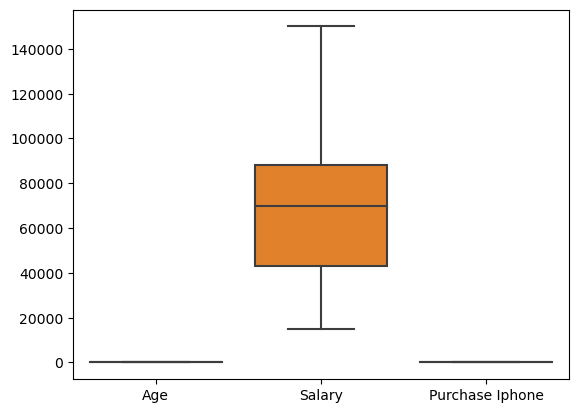

In [19]:
#Checking outliers
sns.boxplot(df)

<Axes: >

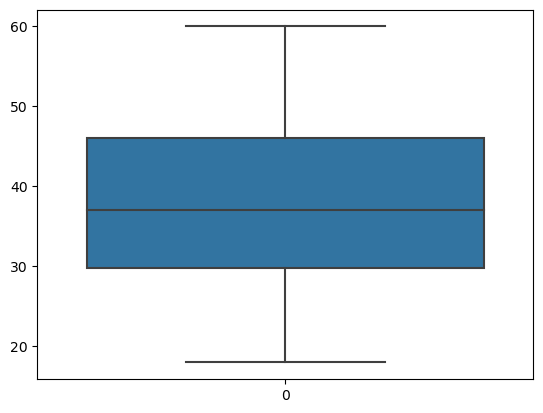

In [20]:
sns.boxplot(df['Age'])

<Axes: >

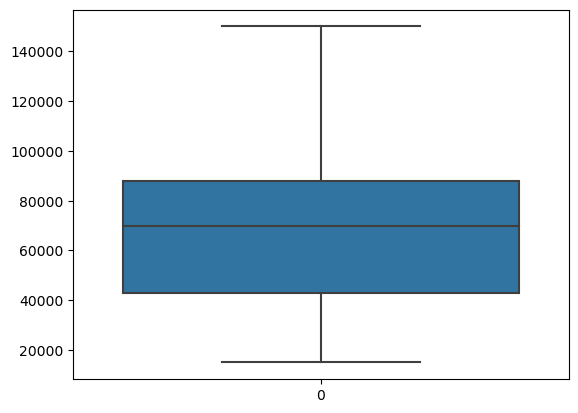

In [22]:
sns.boxplot(df['Salary'])

<Axes: xlabel='Gender', ylabel='Age'>

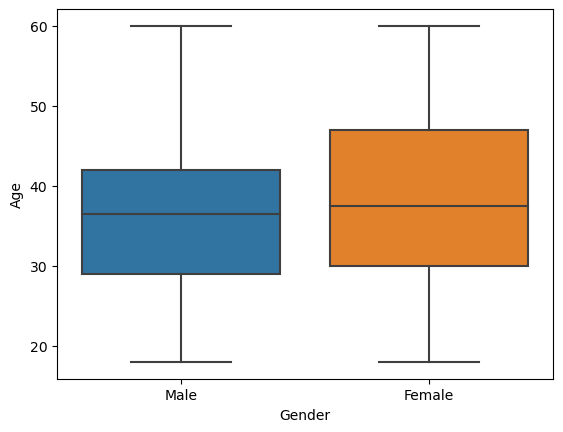

In [23]:
sns.boxplot(x='Gender',y='Age',data=df)

<Axes: xlabel='Gender', ylabel='Salary'>

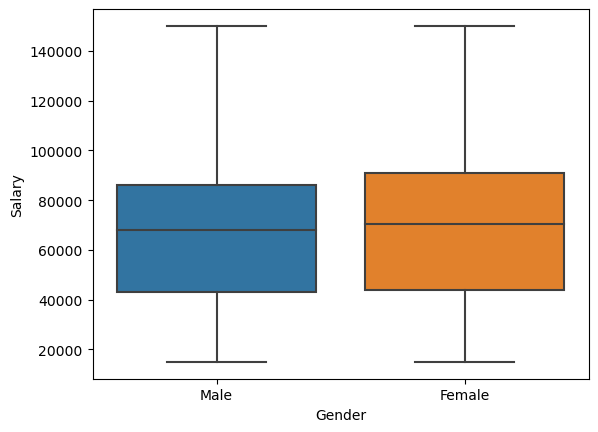

In [24]:
sns.boxplot(x='Gender',y='Salary',data=df)

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


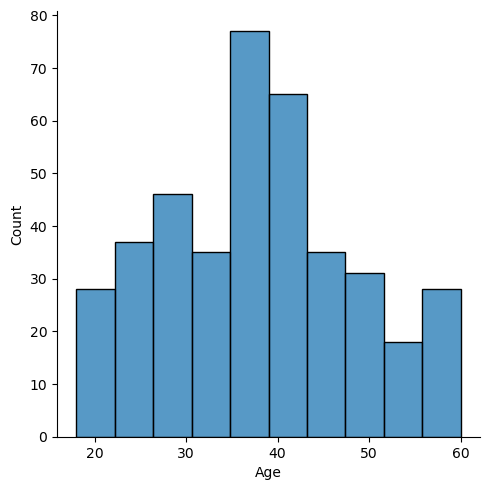

In [25]:
sns.displot(x='Age', data=df)

C:\Users\91878\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


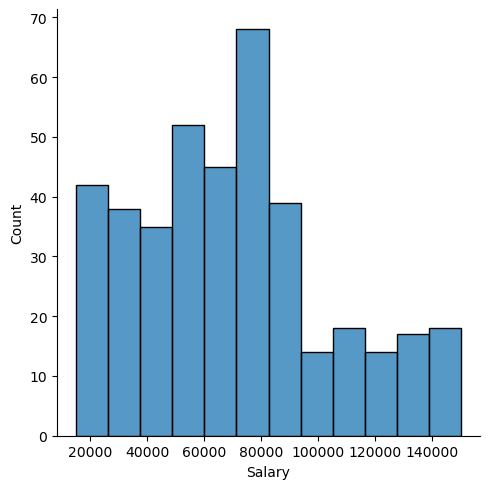

In [26]:
sns.displot(x='Salary',data=df)

<Axes: >

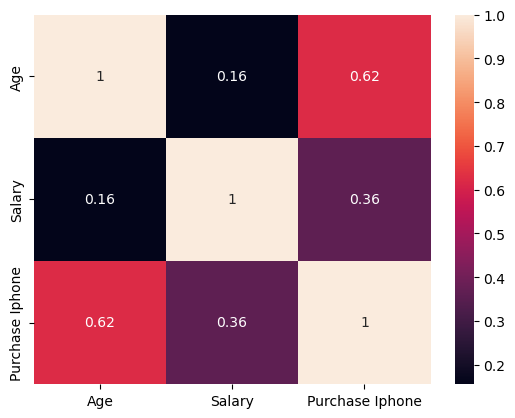

In [27]:
sns.heatmap(df[['Age','Salary','Purchase Iphone']].corr(), annot=True)

### Pre-processing and Sampling

In [41]:
# As the Gender column is string type, we need to encode it to numerical value
d = defaultdict(LabelEncoder)
df = df.apply(lambda lb: d[lb.name].fit_transform(lb))

In [78]:
def data_prep(df):
    X=df[['Gender','Age','Salary']]
    y=df['Purchase Iphone']
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)
    return X_train, X_test,y_train,y_test

In [79]:
X_train,X_test,y_train,y_test=data_prep(df)

In [80]:
X_train.shape

(320, 3)

In [81]:
X_test.shape

(80, 3)

In [88]:
def ds_tree(X_train,X_test,y_test):
    model_clf=DecisionTreeClassifier() ## Create the model
    train_model=model_clf.fit(X_train,y_train) ## Fitting the model
    pred=train_model.predict(X_test) ## Predicting
    return pred

In [89]:
pred=ds_tree(X_train,X_test,y_test)

In [90]:
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [91]:
#Defining model diagnostics
def ds_tree_diag(y_test,pred):
    acc=accuracy_score(y_test, pred)
    clf=classification_report(y_test,pred)
    conf=confusion_matrix(y_test,pred)
    return acc,clf,conf

In [92]:
acc,clf,conf=ds_tree_diag(y_test,pred)
print("The accuracy score:",acc)
print("------------------------------")
print("The Classification Report:", clf)
print("------------------------------")
print("The Confusion Matrix:",conf)

The accuracy score: 0.875
------------------------------
The Classification Report:               precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.83      0.83      0.83        29

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80

------------------------------
The Confusion Matrix: [[46  5]
 [ 5 24]]


### Our model is giving accuracy of 87.5%

In [93]:
model_clf=DecisionTreeClassifier()
train_model=model_clf.fit(X_train,y_train)
unique_classes=train_model.classes_
unique_classes

array([0, 1], dtype=int64)

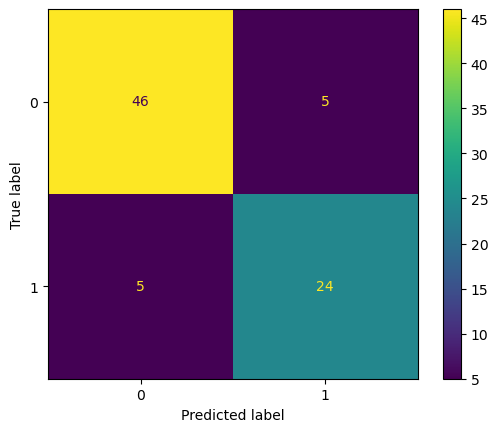

In [94]:
ConfusionMatrixDisplay(conf, display_labels=unique_classes).plot()

### Inference: Purple color in the plot shows wrong predictions of 5 values as False Positive and 5 values as False Negative